In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]

In [7]:
# Example 1: Sample Mean as a Consistent Estimator
# True parameter
true_mean = 5.0

# Different sample sizes
sample_sizes = [5, 10, 30, 100, 300, 1000]
n_simulations = 1000

# Store results
means = []
biases = []
variances = []

# Run simulations
np.random.seed(42)
for n in sample_sizes:
    # Generate n_simulations samples of size n
    samples = np.random.normal(true_mean, 2, size=(n_simulations, n))
    sample_means = np.mean(samples, axis=1)
    
    means.append(sample_means)
    biases.append(np.mean(sample_means) - true_mean)
    variances.append(np.var(sample_means))


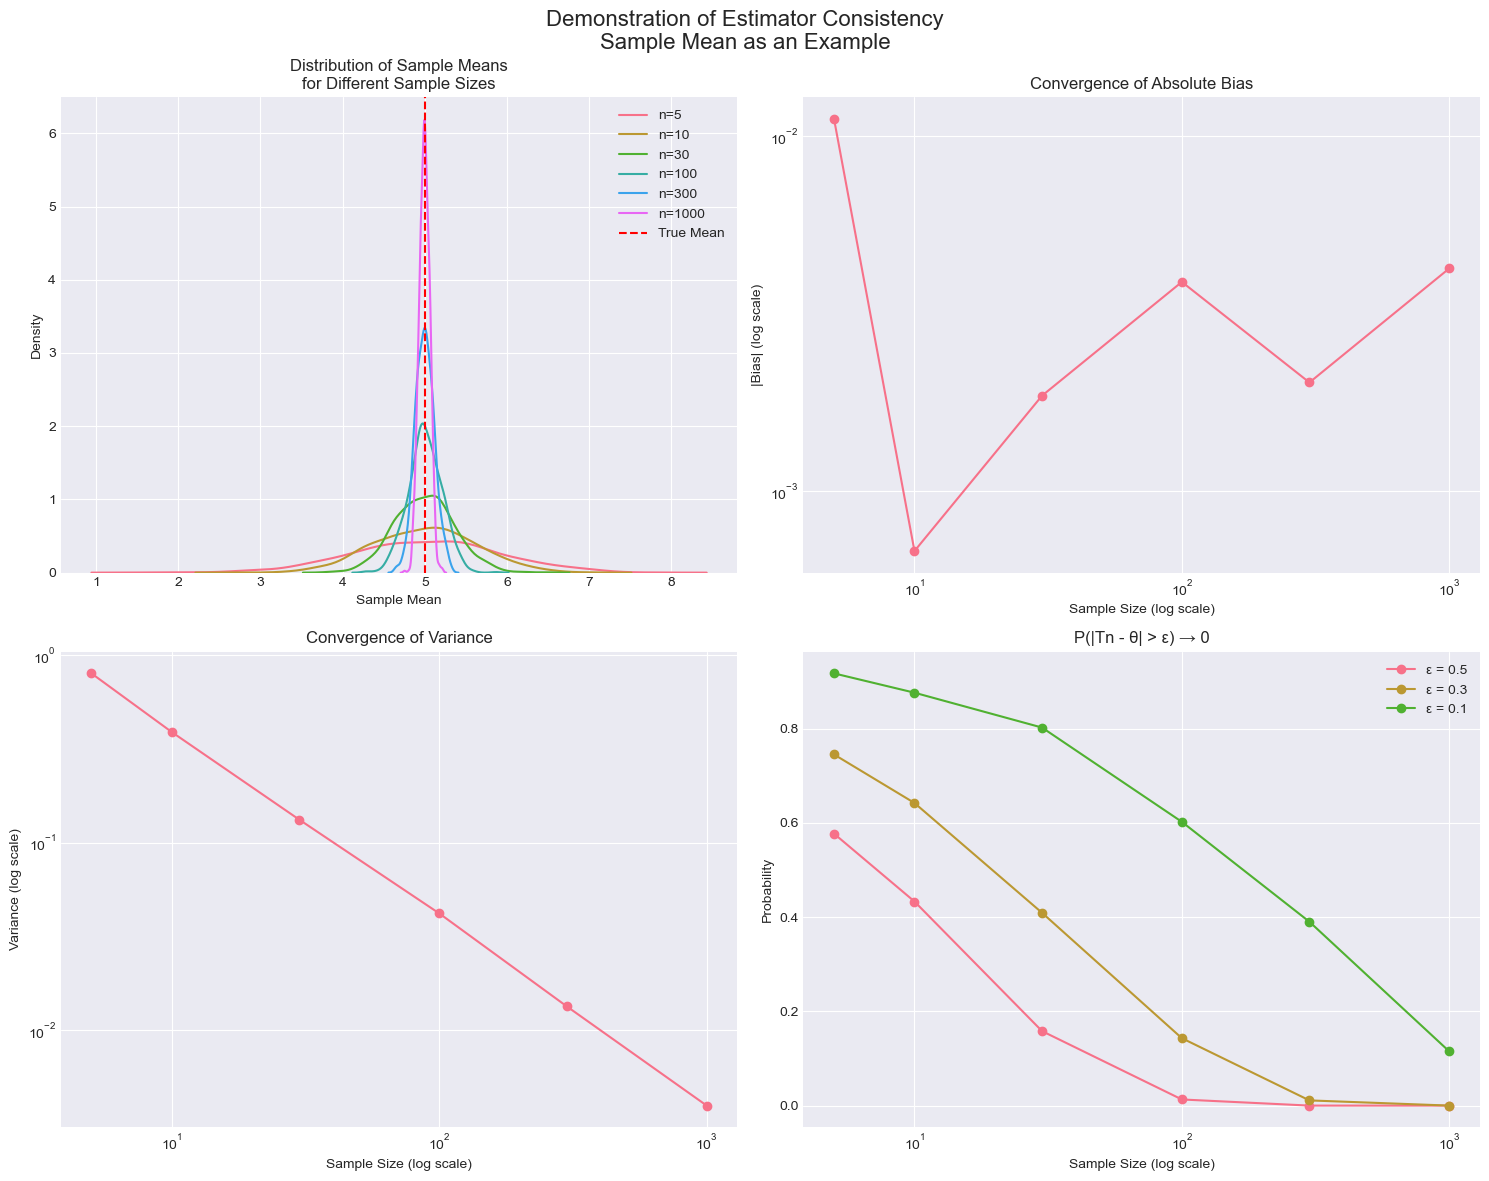

In [8]:

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Demonstration of Estimator Consistency\nSample Mean as an Example', fontsize=16)

# Plot 1: Distribution of estimates for different sample sizes
for i, n in enumerate(sample_sizes):
    sns.kdeplot(data=means[i], ax=ax1, label=f'n={n}')
ax1.axvline(true_mean, color='red', linestyle='--', label='True Mean')
ax1.set_title('Distribution of Sample Means\nfor Different Sample Sizes')
ax1.set_xlabel('Sample Mean')
ax1.set_ylabel('Density')
ax1.legend()

# Plot 2: Bias convergence
ax2.plot(sample_sizes, np.abs(biases), 'o-')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title('Convergence of Absolute Bias')
ax2.set_xlabel('Sample Size (log scale)')
ax2.set_ylabel('|Bias| (log scale)')
ax2.grid(True)

# Plot 3: Variance convergence
ax3.plot(sample_sizes, variances, 'o-')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_title('Convergence of Variance')
ax3.set_xlabel('Sample Size (log scale)')
ax3.set_ylabel('Variance (log scale)')
ax3.grid(True)

# Plot 4: Probability of being far from true value
epsilons = [0.5, 0.3, 0.1]
probs = []
for eps in epsilons:
    prob_far = [np.mean(np.abs(m - true_mean) > eps) for m in means]
    probs.append(prob_far)
    ax4.plot(sample_sizes, prob_far, 'o-', label=f'ε = {eps}')
ax4.set_xscale('log')
ax4.set_title('P(|Tn - θ| > ε) → 0')
ax4.set_xlabel('Sample Size (log scale)')
ax4.set_ylabel('Probability')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()


In [9]:

# Print numerical results
print("\nNumerical Results:")
print("\nSample Size | Absolute Bias | Variance | P(|Tn - θ| > 0.1)")
print("-" * 60)
for i, n in enumerate(sample_sizes):
    print(f"{n:10d} | {abs(biases[i]):12.6f} | {variances[i]:8.6f} | {probs[2][i]:8.6f}")


Numerical Results:

Sample Size | Absolute Bias | Variance | P(|Tn - θ| > 0.1)
------------------------------------------------------------
         5 |     0.011204 | 0.795744 | 0.917000
        10 |     0.000679 | 0.387076 | 0.876000
        30 |     0.001860 | 0.132206 | 0.802000
       100 |     0.003890 | 0.041961 | 0.602000
       300 |     0.002026 | 0.013421 | 0.390000
      1000 |     0.004245 | 0.003981 | 0.115000


## Key Observations:

1. **Bias:** The absolute bias rapidly approaches zero as sample size increases
2. **Variance:** The variance steadily decreases with larger sample sizes
3. **Consistency:** The probability of being far from the true value (by any fixed amount ε) approaches zero
4. **Rate of Convergence:** The log-log plots show that convergence follows power laws